# PRML Assignment 8

### Aim: To apply the K-means clustering algorithm on a data set of customer transactions and segment the customers into different groups based on their spending patterns. 

In [11]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [19]:
pip install -U threadpoolctl

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


### Exercise 1: Load the data set and perform some exploratory data analysis. Plot the distributions of the features and check for missing values or outliers. 

In [35]:
# reading the data
data = pd.read_csv(r"C:\Users\Deena\Desktop\PDEU\datasets\Customers- K means.csv")

In [36]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [38]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [39]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

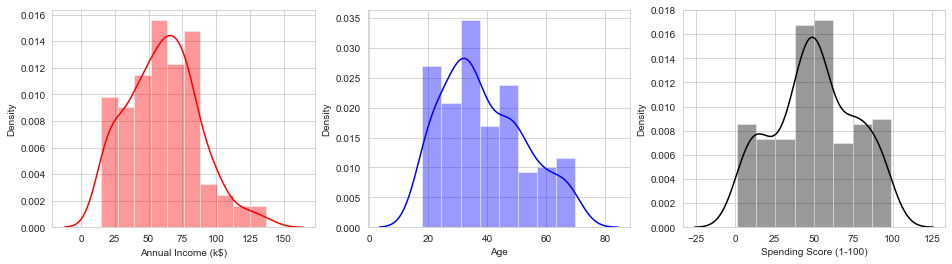

In [41]:
# plotting for the distributions
plt.figure(figsize=(16,4))
sns.set_style("whitegrid") 
plt.subplot(1,3,1)
sns.distplot(data['Annual Income (k$)'], kde=True, color="red")
plt.subplot(1,3,2)
sns.distplot(data['Age'], kde=True, color='blue')
plt.subplot(1,3,3)
sns.distplot(data['Spending Score (1-100)'], kde=True, color='black')

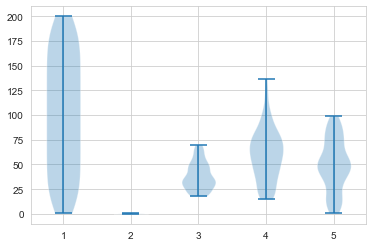

In [42]:
plt.violinplot(data)
plt.show()

### Exercise 2: Choose a value for K, the number of clusters. You can use following methods to determine the optimal value of K, such as the elbow method, the silhouette method, or your own intuition. 

### Based on the below performed methods, the optimal value of k is 5

In [43]:
# standardizing the data
#ss = StandardScaler()
#scaled_df = ss.fit_transform(data)

In [44]:
df = data.iloc[:, [3,4]].values
#df = data.copy()

In [45]:
# elbow method
# inertia - sum of squared distances of samples to their closest cluster center
# sum of squared distances - ssd
ssd = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)

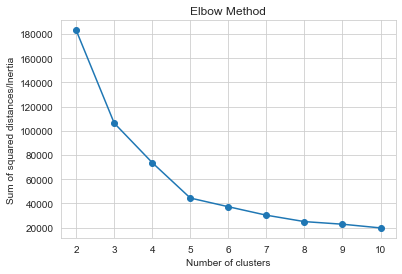

In [46]:
# plotting the elbow method graph
plt.plot(range(2, 11), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances/Inertia')
plt.show()

In [47]:
# silhouette method
# sils - silhouette scores
sils = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    sils.append(silhouette_avg)

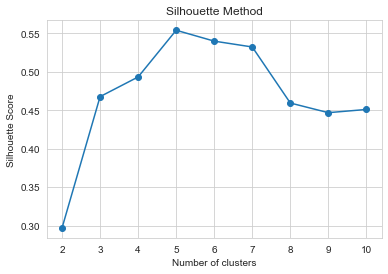

In [48]:
# plotting the silhouette scores
plt.plot(range(2, 11), sils, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Exercise 3:  Implement the K-means clustering algorithm using Python. You can use any library or framework of your choice, such as NumPy, SciPy, scikit-learn, etc. 

In [49]:
opt_k = 5

# applying K-means clustering algorithm
kmeans = KMeans(n_clusters=opt_k, init='k-means++')
y_kmeans = kmeans.fit_predict(df)

In [50]:
# adding cluster labels to the original dataset
data['Cluster'] = y_kmeans

### Exercise 4: Apply the K-means algorithm on the data set and assign each customer to a cluster. Plot the clusters and the cluster centroids on a scatter plot. You can choose any two features to plot, such as Annual Income and Spending Score, or Age and Gender.

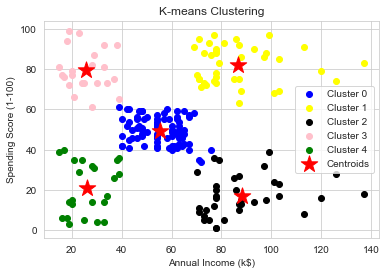

In [55]:
# plotting clusters and centroids
#plt.figure(figsize=(8, 6))
color = ['blue', 'yellow', 'black', 'pink', 'green']
#plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, cmap='viridis')
for i in range(opt_k):
    cp = df[kmeans.labels_ == i] 
    plt.scatter(cp[:, 0], cp[:, 1], c=color[i],
                cmap='viridis', label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.legend()
plt.show()

### Exercise 5: Interpret the results and describe the characteristics of each cluster. What are the similarities and differences among the customers in each cluster? How can this information be useful for marketing or business strategies?

Based on the above plot, here are the interpretations for each clusters:

In [60]:
dict1 = {'Cluster Number': ['0','1','2','3','4'],
        'Annual Income': ['Average', 'High', 'High', 'Low', 'Low'],
        'Spending Score': ['Average', 'High', 'Low', 'High', 'Low'],
        'Business Strategies': ['Programs and discounts to maintain their average habits',
                                'Focus on luxury services/products, exclusive memberships',
                                'Show value of premium services as well as new investments',
                                'Products in their affordability range as well as quality',
                                'Budget friendly and affordability']}

In [62]:
pd.set_option('display.max_colwidth', None)
interpret = pd.DataFrame.from_dict(dict1)
interpret

,Cluster Number,Annual Income,Spending Score,Business Strategies
0,0,Average,Average,Programs and discounts to maintain their average habits
1,1,High,High,"Focus on luxury services/products, exclusive memberships"
2,2,High,Low,Show value of premium services as well as new investments
3,3,Low,High,Products in their affordability range as well as quality
4,4,Low,Low,Budget friendly and affordability


### Optional Challenge Objective: To apply the K-means clustering algorithm on an image dataset of flowers and segment the images into different regions based on the color of the pixels. 

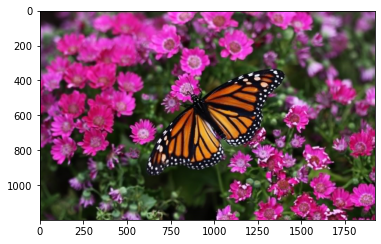

In [7]:
import matplotlib.image as mimg
 
# Read Images
img1 = mimg.imread(r"C:\Users\Deena\Downloads\flower.jpg")
plt.imshow(img1)

In [9]:
img1.shape

(1200, 1920, 3)

In [10]:
img2 = img1/255.0
img2 = img2.reshape(1200 * 1920, 3)
img2.shape

(2304000, 3)

In [28]:
k_range = (2,8)
#kmeans = MiniBatchKMeans(n_clusters=k,init='k-means++')
#kmeans.fit(img2)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    new_col = kmeans.cluster_centers_[kmeans.predict(img2)]

Text(0.5, 1.0, 'Recoloured Image')

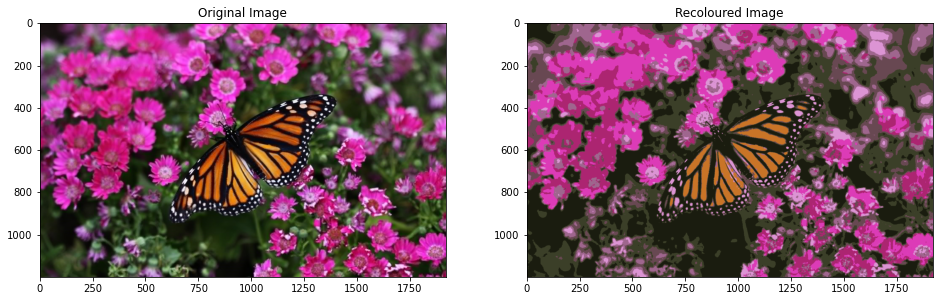

In [29]:
recol = new_col.reshape(img1.shape)

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(recol)
plt.title('Recoloured Image')